# Maier dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
graph = Graph_MCMC()
graph.read_from_ns("facebook_friends")
graph.convert_props_to_flags()
graph.add_ego_node()

In [3]:
graph.print_info()

Graph with N=363 nodes, E=2350 edges and D=32 vertex features for training


In [4]:
graph.partition(B_min=5, B_max=5)

Performing inference...
Current bracket: (5, 5, 5) (5975.831711922406, 5975.831711922406, 5975.831711922406)
Current bracket: (5, 5, 5) (5975.831711922406, 5975.831711922406, 5975.831711922406)
Bisect at B = 5 with S = 5975.831711922406
Best result: B = 5, S = 5975.831711922406
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f465f6c7bb0, at 0x7f465cece700>

In [5]:
graph.mcmc(num_iter=1000)

100%|██████████| 1000/1000 [00:00<00:00, 1777.59it/s]


5

Drawing soft partition


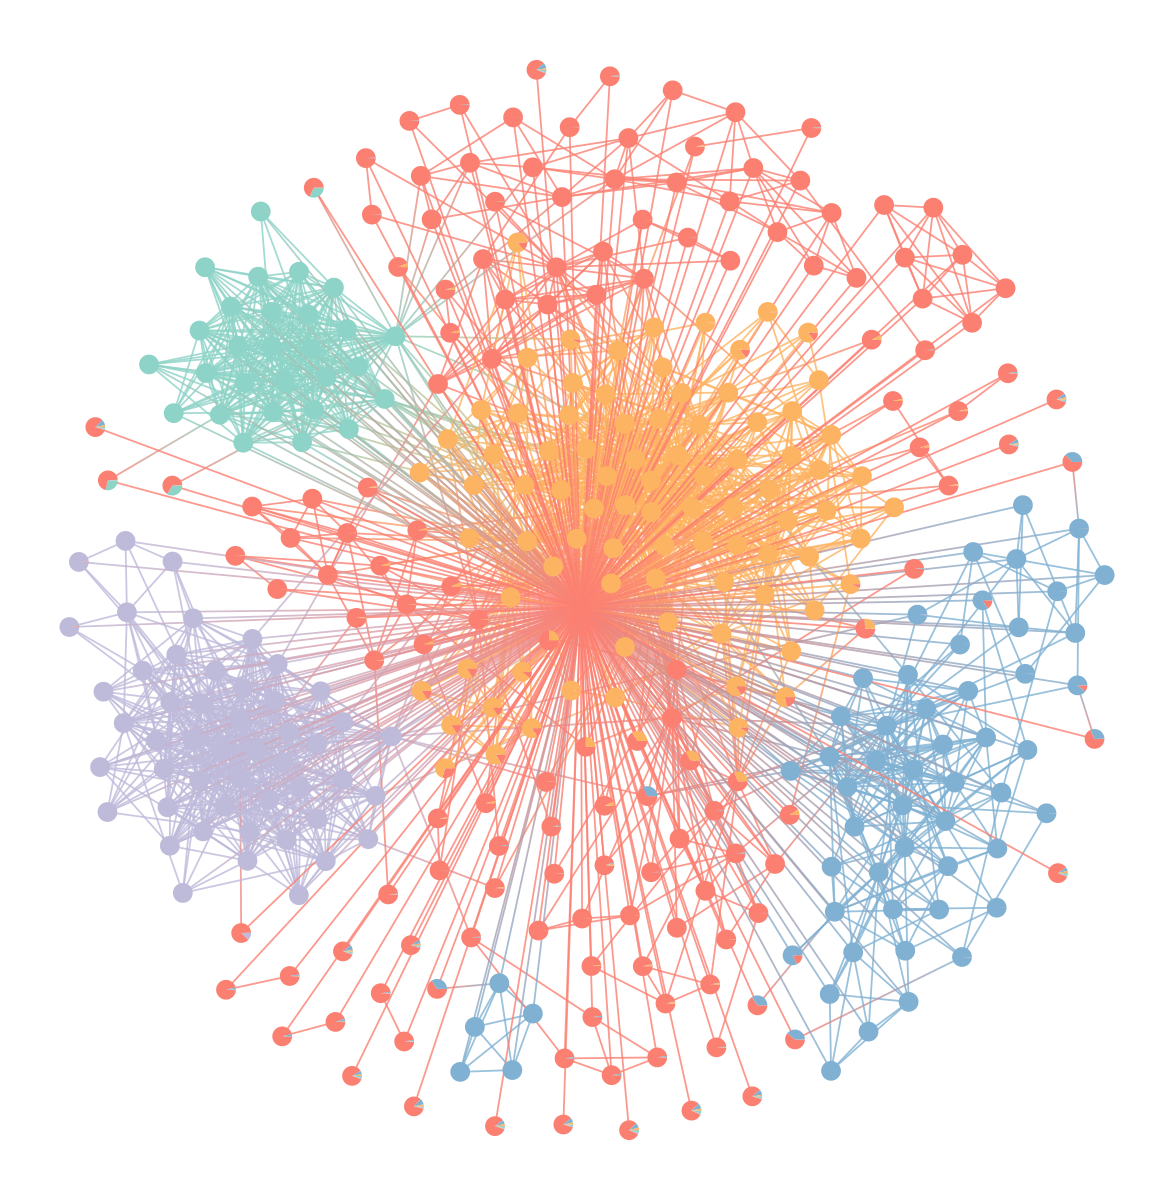

In [6]:
graph.draw()

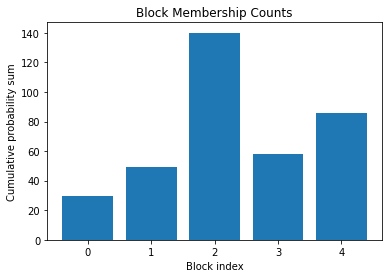

In [7]:
graph.plot_posterior_props()

## Train classifier

In [8]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

100%|██████████| 10000/10000 [00:10<00:00, 982.55it/s]Sample accept ratio: 88.94999999999999%
Train. set accuracy: 67.4931129476584%



## Interpret results

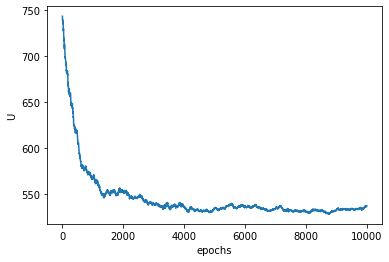

In [9]:
classifier.plot_U()

In [10]:
classifier.thin_samples()

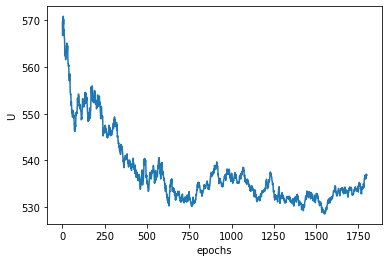

In [11]:
classifier.plot_U()

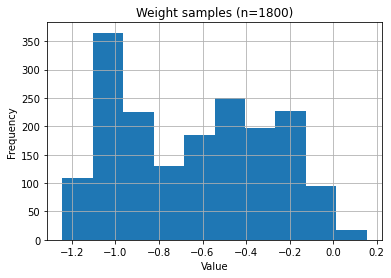

In [12]:
classifier.plot_sample_histogram()

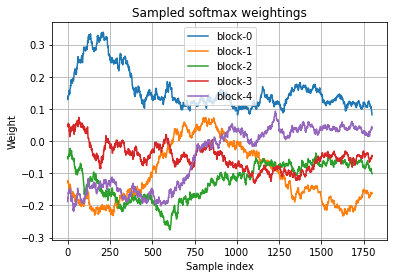

In [13]:
classifier.plot_sample_history()

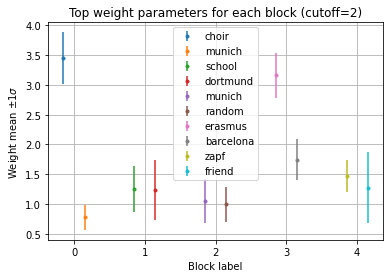

In [14]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=2, legend=True)

Discarding feature 24: xrays


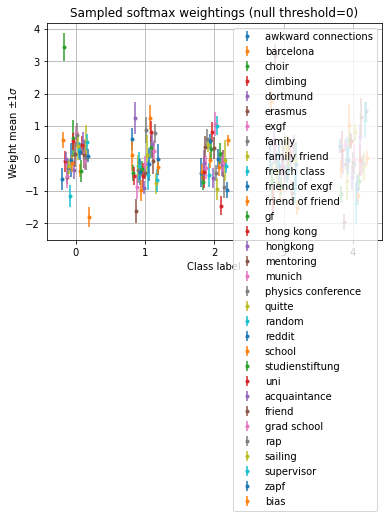

In [15]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=0, legend=True)